<a href="https://colab.research.google.com/github/steinruck/WANG-690-FALL-2020/blob/master/Final_Project/Deliverable2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# read auth.txt file and assign column headers using | delimeter 
df = pd.read_csv("auth.txt", names=["Date", "IP", "Service", "Description"], delimiter='|')

In [3]:
df.head()

,Date,IP,Service,Description
0,Nov 30 06:39:00,ip-172-31-27-153,CRON[21882],pam_unix(cron:session): session closed for use...
1,Nov 30 06:47:01,ip-172-31-27-153,CRON[22087],pam_unix(cron:session): session opened for use...
2,Nov 30 06:47:03,ip-172-31-27-153,CRON[22087],pam_unix(cron:session): session closed for use...
3,Nov 30 07:07:14,ip-172-31-27-153,sshd[22116],Connection closed by 122.225.103.87 [preauth]
4,Nov 30 07:07:35,ip-172-31-27-153,sshd[22118],Connection closed by 122.225.103.87 [preauth]


In [4]:
df.tail()

,Date,IP,Service,Description
86834,Dec 31 22:26:20,ip-172-31-27-153,sshd[7998],Connection closed by 218.2.0.133 [preauth]
86835,Dec 31 22:27:07,ip-172-31-27-153,sshd[8001],Connection closed by 218.2.0.133 [preauth]
86836,Dec 31 22:27:48,ip-172-31-27-153,sshd[8003],Invalid user admin from 218.2.0.133
86837,Dec 31 22:27:48,ip-172-31-27-153,sshd[8003],input_userauth_request: invalid user admin [pr...
86838,Dec 31 22:27:48,ip-172-31-27-153,sshd[8003],Connection closed by 218.2.0.133 [preauth]


In [5]:
# Number of rows and columns
df.shape

(86839, 4)

In [6]:
# Sample of 5 random rows
df.sample(5)

,Date,IP,Service,Description
27542,Dec 6 08:50:08,ip-172-31-27-153,sshd[8182],input_userauth_request: invalid user weblogic ...
7280,Dec 2 09:05:09,ip-172-31-27-153,sshd[680],Received disconnect from 220.99.93.50: 11: Bye...
13620,Dec 2 14:48:25,ip-172-31-27-153,sshd[11998],Received disconnect from 218.25.17.234: 11: By...
1660,Dec 1 08:32:54,ip-172-31-27-153,sshd[25053],input_userauth_request: invalid user jboss [pr...
22072,Dec 3 01:38:18,ip-172-31-27-153,sshd[29215],fatal: Read from socket failed: Connection res...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86839 entries, 0 to 86838
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         86839 non-null  object
 1   IP           86839 non-null  object
 2   Service      86839 non-null  object
 3   Description  86839 non-null  object
dtypes: object(4)
memory usage: 2.7+ MB


In [8]:
df.describe()

,Date,IP,Service,Description
count,86839,86839,86839,86839
unique,54811,1,29356,9658
top,Dec 29 18:18:32,ip-172-31-27-153,sshd[23890],Received disconnect from 61.197.203.243: 11: B...
freq,18,86839,13,10852


In [9]:
# Remove leading ip string from IP column (works here because the IP is from the singular host device)
df["IP"]= df["IP"].replace("ip-172-31-27-153", "172.31.27.153")
df.head()


,Date,IP,Service,Description
0,Nov 30 06:39:00,172.31.27.153,CRON[21882],pam_unix(cron:session): session closed for use...
1,Nov 30 06:47:01,172.31.27.153,CRON[22087],pam_unix(cron:session): session opened for use...
2,Nov 30 06:47:03,172.31.27.153,CRON[22087],pam_unix(cron:session): session closed for use...
3,Nov 30 07:07:14,172.31.27.153,sshd[22116],Connection closed by 122.225.103.87 [preauth]
4,Nov 30 07:07:35,172.31.27.153,sshd[22118],Connection closed by 122.225.103.87 [preauth]


In [10]:
# If Description column contains the regex pattern for IP addresses, create neew column with the IP
df["Connecting IP"] = df["Description"].str.extract(r'(\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3})')
df.head()

,Date,IP,Service,Description,Connecting IP
0,Nov 30 06:39:00,172.31.27.153,CRON[21882],pam_unix(cron:session): session closed for use...,NaN
1,Nov 30 06:47:01,172.31.27.153,CRON[22087],pam_unix(cron:session): session opened for use...,NaN
2,Nov 30 06:47:03,172.31.27.153,CRON[22087],pam_unix(cron:session): session closed for use...,NaN
3,Nov 30 07:07:14,172.31.27.153,sshd[22116],Connection closed by 122.225.103.87 [preauth],122.225.103.87
4,Nov 30 07:07:35,172.31.27.153,sshd[22118],Connection closed by 122.225.103.87 [preauth],122.225.103.87


In [11]:
# Remove string in brackets from Service column 
df["Service"] = df["Service"].str.replace('[\[^0-9\]]', '', regex=True)
df.head()

,Date,IP,Service,Description,Connecting IP
0,Nov 30 06:39:00,172.31.27.153,CRON,pam_unix(cron:session): session closed for use...,NaN
1,Nov 30 06:47:01,172.31.27.153,CRON,pam_unix(cron:session): session opened for use...,NaN
2,Nov 30 06:47:03,172.31.27.153,CRON,pam_unix(cron:session): session closed for use...,NaN
3,Nov 30 07:07:14,172.31.27.153,sshd,Connection closed by 122.225.103.87 [preauth],122.225.103.87
4,Nov 30 07:07:35,172.31.27.153,sshd,Connection closed by 122.225.103.87 [preauth],122.225.103.87


In [17]:
# Creates new dataframe of unique IPs in Connecting IP column
uniqueIP = pd.DataFrame(df['Connecting IP'].unique().tolist())
#uniqueIP.drop(uniqueIP.columns[[0]], axis=1, inplace=True)
uniqueIP


,0
0,NaN
1,122.225.103.87
2,187.12.249.74
3,196.200.90.236
4,1.93.26.70
...,...
1915,122.225.109.120
1916,54.173.59.105
1917,144.0.0.57
1918,54.173.59.126


In [18]:
# Creates new dataframe with a column that counts the total number of occurances of that IP
connecting_IP = pd.DataFrame(df['Connecting IP'].value_counts().reset_index().values, columns=["IP", "Count"])
connecting_IP

,IP,Count
0,61.197.203.243,11261
1,220.99.93.50,10752
2,218.25.17.234,5616
3,188.87.35.25,3676
4,67.205.20.23,1804
...,...,...
1914,121.41.77.133,1
1915,171.13.14.44,1
1916,220.247.238.237,1
1917,61.219.98.102,1


AttributeError: ignored

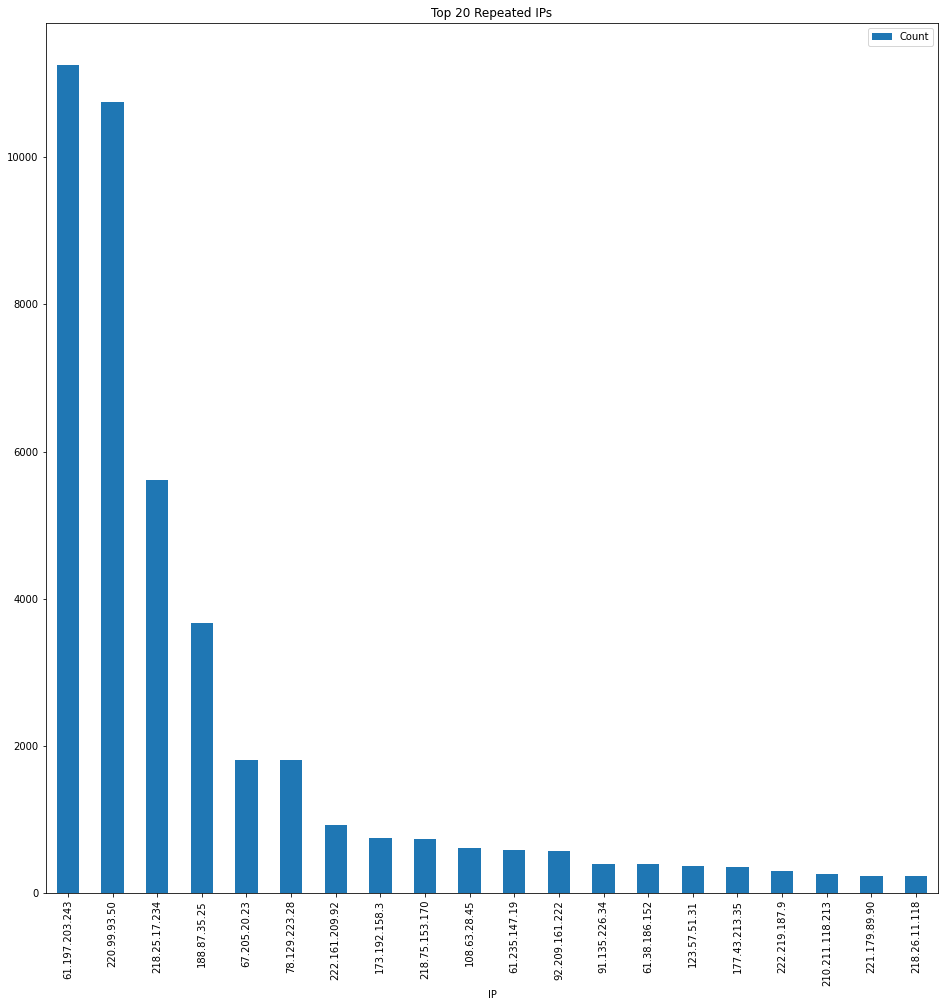

In [27]:
# Bar graph that plots the top 50 occuring IP addresses
connecting_IP.iloc[0:20].plot(kind='bar', title='Top 20 Repeated IPs', x='IP', y='Count', figsize=(16,16))  
plt.show()


In [21]:
# Count of unique IPs (includes NaN)
df['Connecting IP'].nunique()

1919

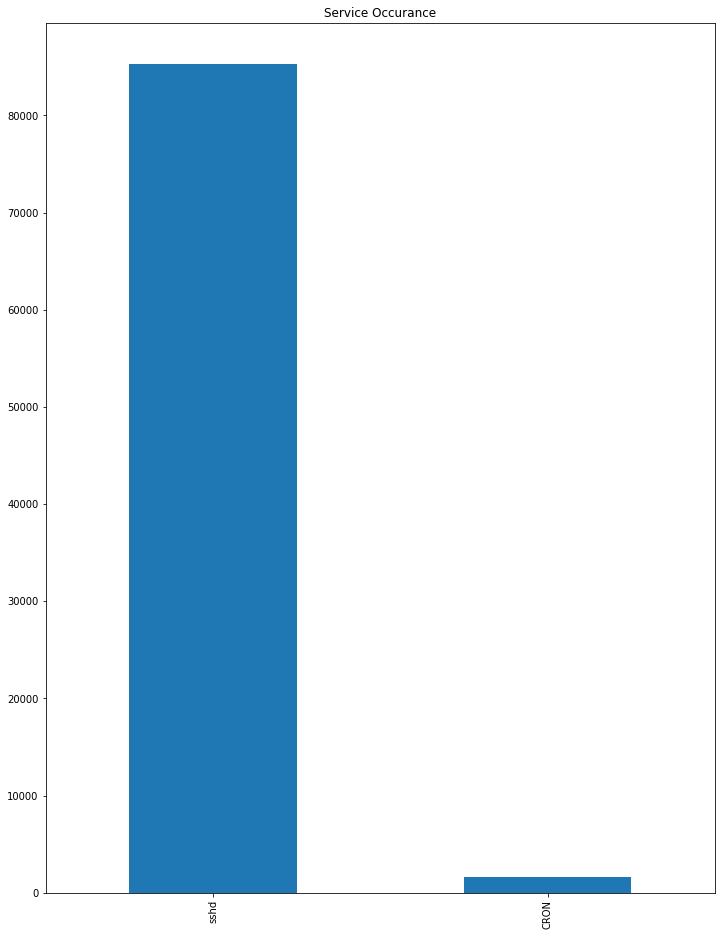

In [22]:
# Graph of the services used and how frequently (couldn't figure out how to get axis labels)
df['Service'].value_counts().plot(kind='bar', title='Service Occurance', figsize=(12,16))  
plt.show()